In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
pd.set_option('display.max_columns', None)

In [232]:
df = pd.read_csv(r'C:\Real Estate Capstone Project\Datasets\gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [233]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,763.05,NaN,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2.0,3.0,3,4.0,East,Relatively New,1282.95,978.23,734.43,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2.0,2.0,2,10.0,East,New Property,582.97,565.00,483.00,0,0,0,0,0,1,23


In [234]:
df.shape

(3677, 23)

In [235]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

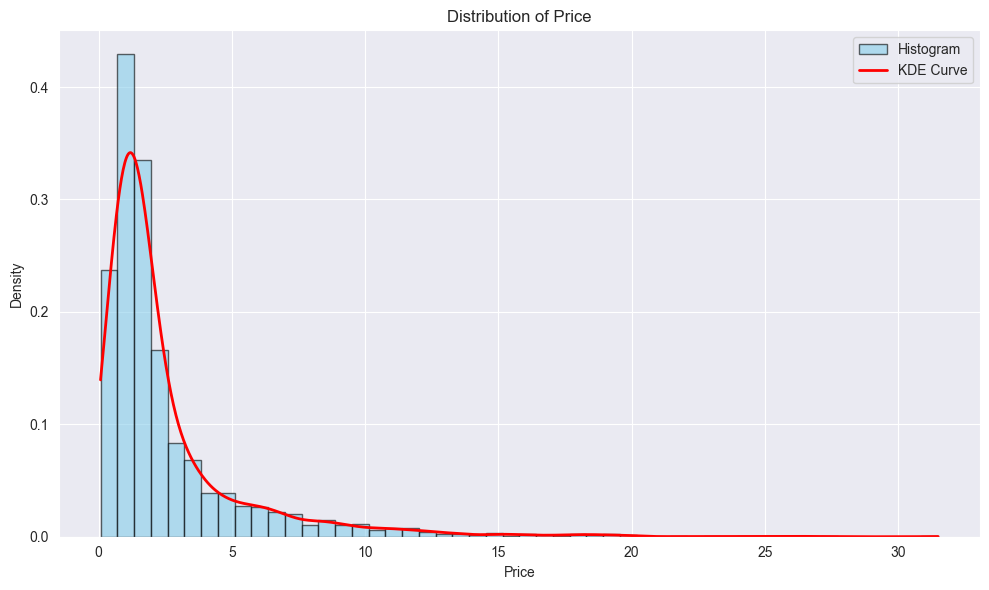

In [236]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Drop NaN and get price values
price_data = df['price'].dropna()

# Create histogram
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(price_data, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')

# Create KDE
kde = gaussian_kde(price_data)
x_vals = np.linspace(price_data.min(), price_data.max(), 1000)
y_vals = kde(x_vals)

# Plot KDE line
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='KDE Curve')

# Add labels and legend
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='price'>

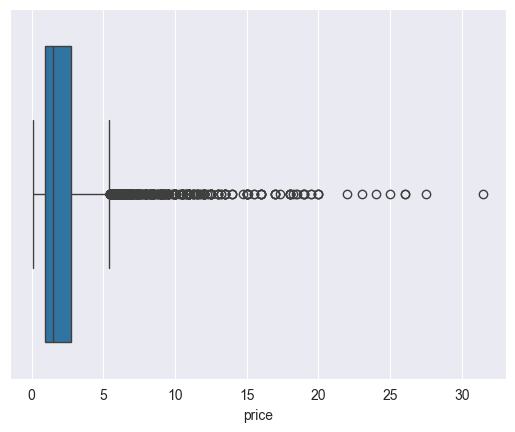

In [237]:
sns.boxplot(x=df['price'])

In [238]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [239]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1233,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
3134,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
925,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
2551,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
3690,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1791,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1695,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
111,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2208,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
1861,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [240]:
outliers.to_csv("outliers_price.csv",index=False)

In [241]:
outliers['property_type'].value_counts()

property_type
house    344
flat      81
Name: count, dtype: int64

### Price_per_sqft

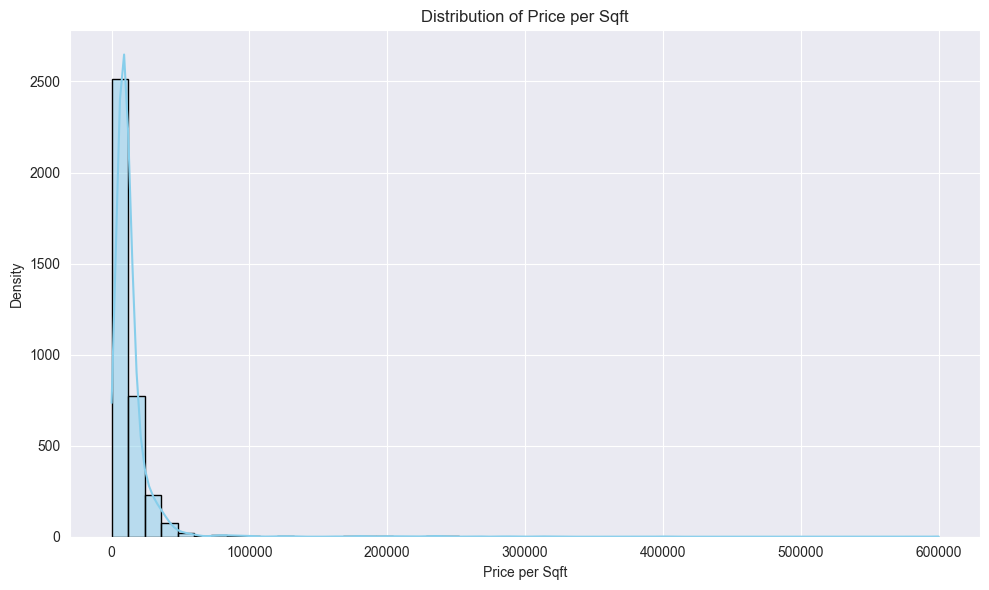

In [242]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'].dropna(), bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='price_per_sqft'>

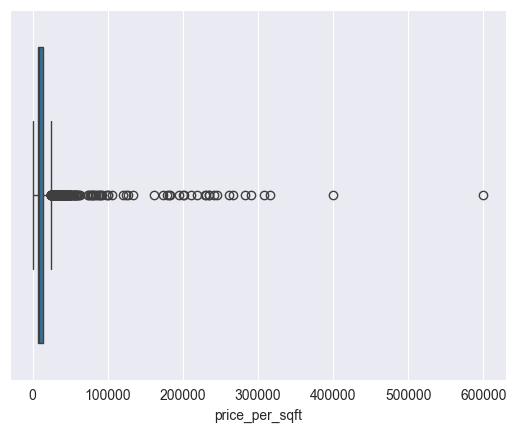

In [243]:
sns.boxplot(x=df['price_per_sqft'])

In [244]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [245]:
outliers_sqft['area'] = pd.to_numeric(outliers_sqft['area'], errors='coerce')

outliers_sqft.loc[:, 'area'] = outliers_sqft['area'].apply(lambda x: x * 9 if pd.notnull(x) and x < 1000 else x)


C:\Users\dell\AppData\Local\Temp\ipykernel_7896\153948229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = pd.to_numeric(outliers_sqft['area'], errors='coerce')


In [246]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\dell\AppData\Local\Temp\ipykernel_7896\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [247]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [248]:
df.update(outliers_sqft)

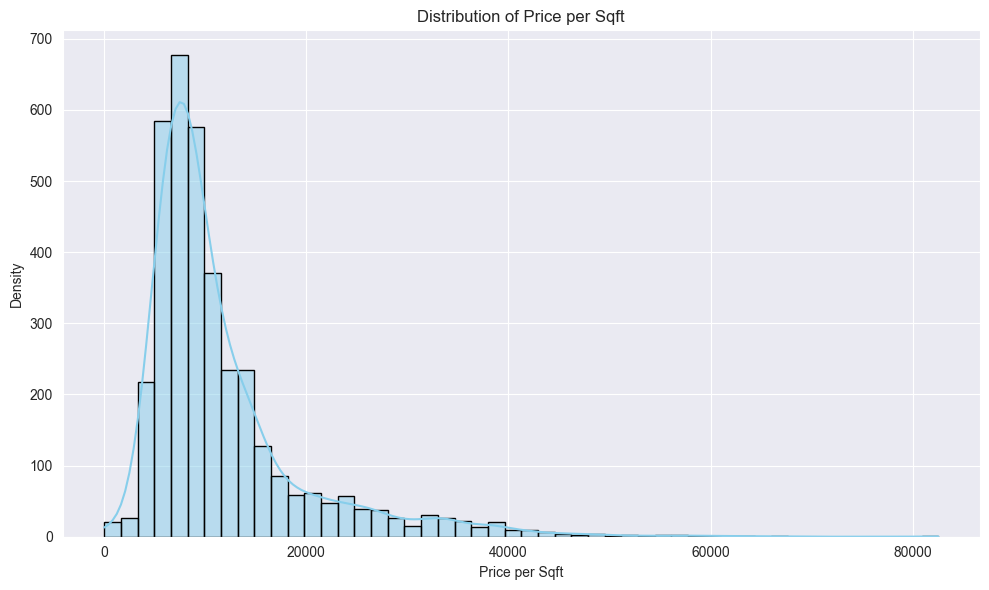

In [249]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'].dropna(), bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='price_per_sqft'>

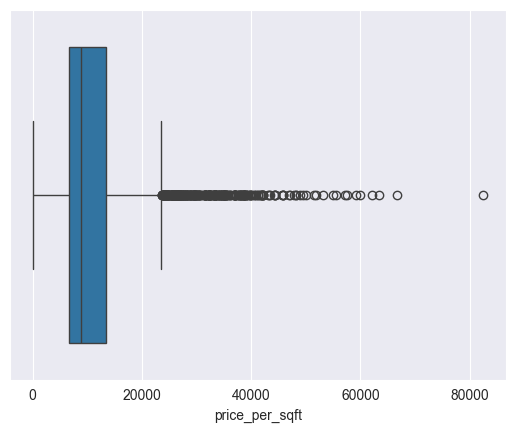

In [250]:
sns.boxplot(x=df['price_per_sqft'])

In [251]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
50,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1599.95,NaN,0,0,0,0,0,1,99
150,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.00,NaN,1,1,0,0,0,1,160
925,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.00,350.0,1,1,1,1,0,1,72
1403,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1564.96,NaN,0,0,0,0,0,0,0
1791,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.00,NaN,1,1,0,1,0,1,122
2241,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.00,200.0,1,1,1,1,0,1,103
2403,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.00,300.0,1,1,1,1,0,1,72
2551,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.00,NaN,1,1,0,1,1,1,138
3007,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,1260.02,NaN,0,0,0,0,0,0,0
3192,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.00,NaN,0,0,0,0,0,0,0


In [252]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

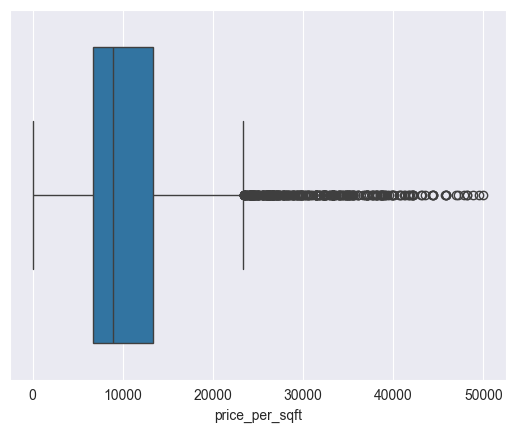

In [253]:
sns.boxplot(x=df['price_per_sqft'])

### Area

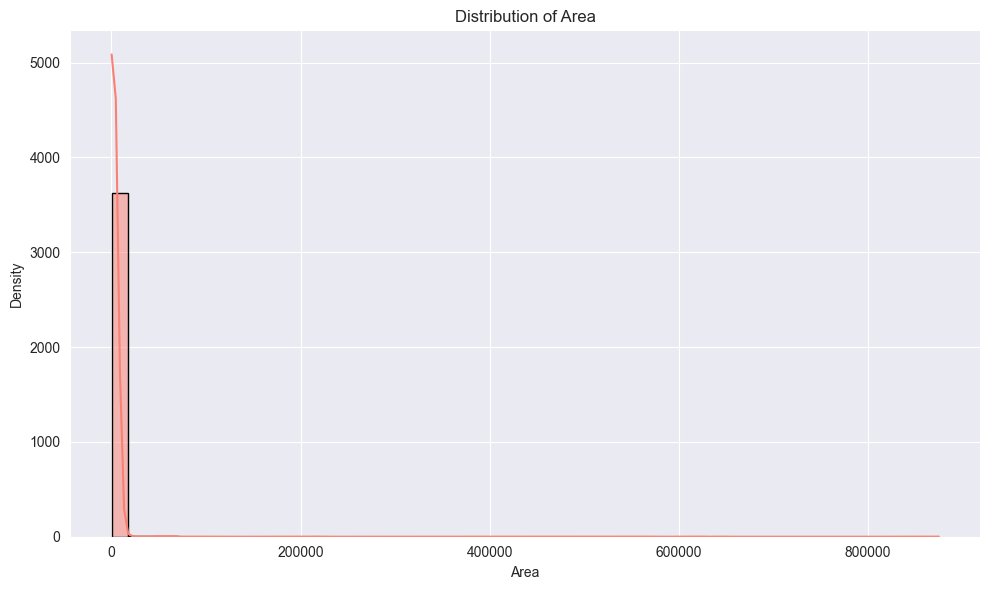

In [254]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'].dropna(), bins=50, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='area'>

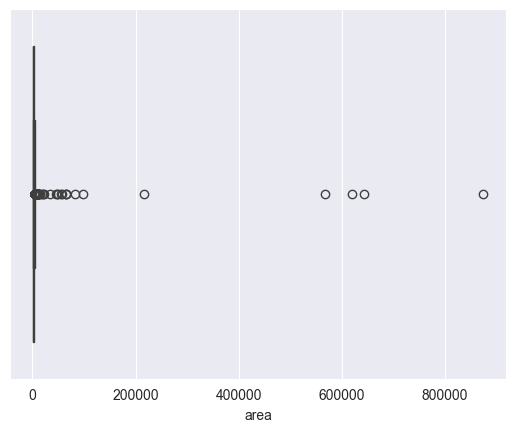

In [255]:
sns.boxplot(x=df['area'])

In [256]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [257]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
871,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514395.48,0,0,0,0,0,0,44
919,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569242.50,0,0,0,0,0,0,76
1732,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607935.38,1,0,0,0,1,0,65
2904,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737146.32,NaN,0,0,0,0,0,2,44
3504,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.00,NaN,1,1,0,1,1,1,0


In [258]:
df = df[df['area'] < 100000]

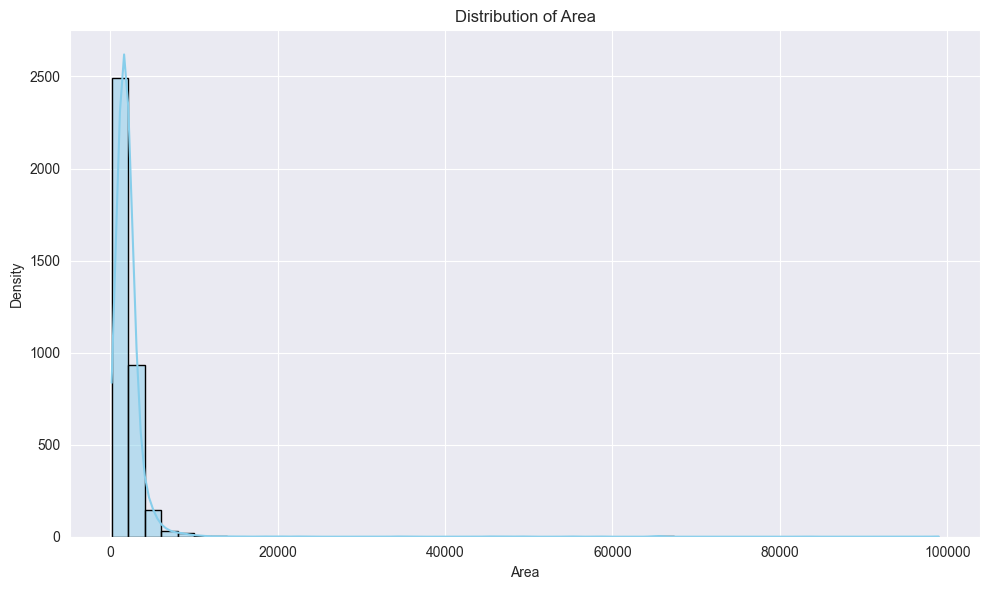

In [259]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'].dropna(), bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='area'>

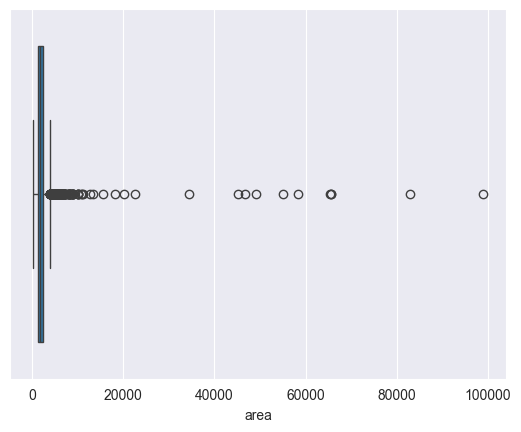

In [260]:
sns.boxplot(x=df['area'])

In [261]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3363,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2069,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
2884,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64528.93,1,0,0,0,0,0,15
2456,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64411.93,0,0,0,0,0,0,51
1062,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,65249.90,0,0,0,0,0,0,0
1221,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58140.99,0,0,0,0,0,0,15
2875,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54916.99,0,0,0,0,0,0,37
3410,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48810.95,1,0,0,0,0,0,37
3302,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1248,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45965.94,0,0,0,0,1,0,33


In [262]:
error_indices = [2069, 2884, 2456, 1221, 2875, 3410, 3302, 1248, 778, 662, 1781, 263, 2330, 3134, 459, 888]
df.drop(index=error_indices, inplace=True, errors='ignore')

In [263]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3363,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
1062,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,65249.90,0,0,0,0,0,0,0
1388,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18121.99,1,0,0,1,1,1,44
72,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55


In [264]:
df.loc[3363, 'area'] = 11000.00
df.loc[72, 'area'] = 1175

df.drop(index=[1062, 1388], inplace=True, errors='ignore')

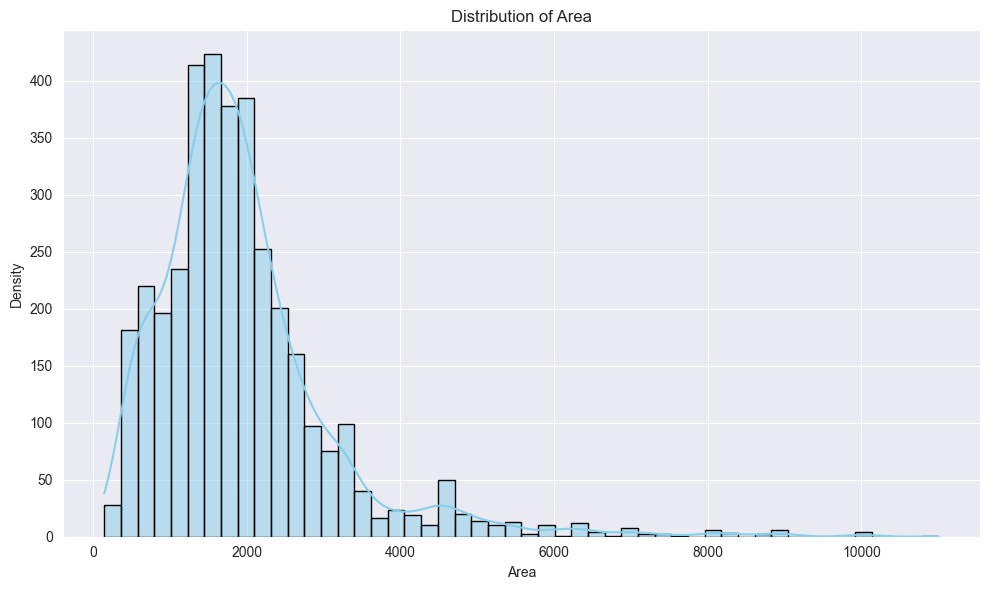

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'].dropna(), bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='area'>

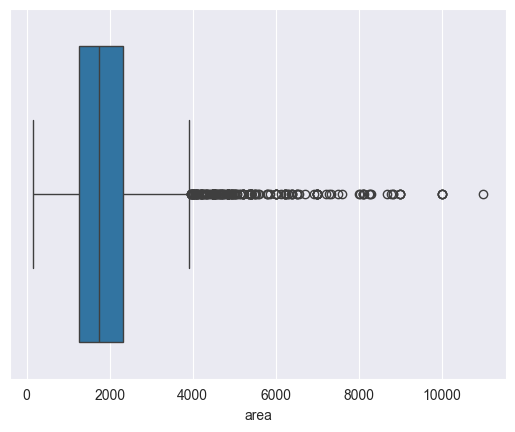

In [266]:
sns.boxplot(x=df['area'])

In [267]:
df['area'].describe()

count     3624.000000
mean      1942.603477
std       1193.078331
min        145.000000
25%       1260.000000
50%       1745.000000
75%       2324.000000
max      11000.000000
Name: area, dtype: float64

### Bedroom

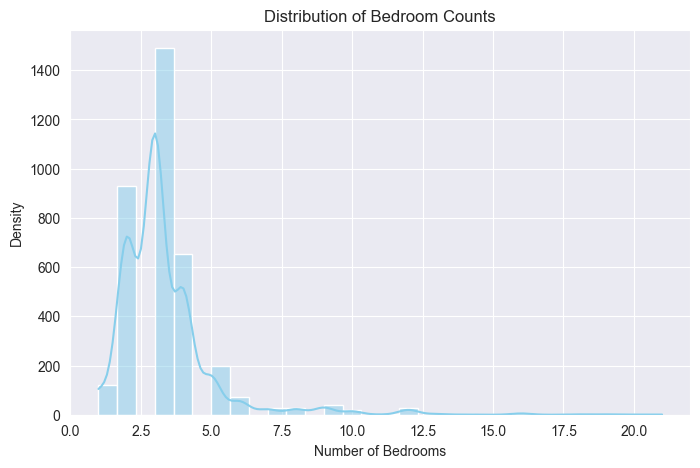

In [268]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bedRoom'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Bedroom Counts")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Density")
plt.grid(True)
plt.show()


<Axes: xlabel='bedRoom'>

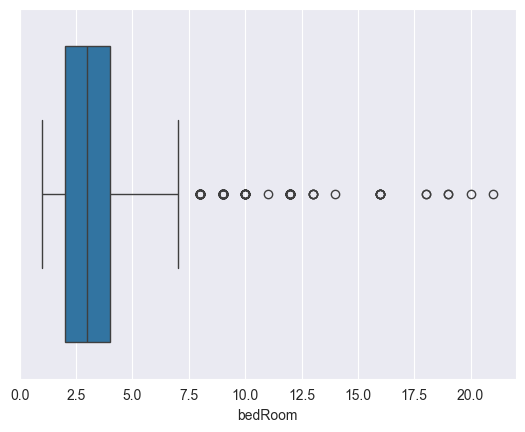

In [269]:
sns.boxplot(x=df['bedRoom'])

In [270]:
df['bedRoom'].describe()

count    3624.000000
mean        3.325331
std         1.818984
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [271]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1271,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
2694,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
1542,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
1251,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
1109,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1615,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1861,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
1441,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
1202,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
754,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,0,41


In [272]:
df = df[df['bedRoom'] <= 10]

In [273]:
df.shape

(3579, 23)

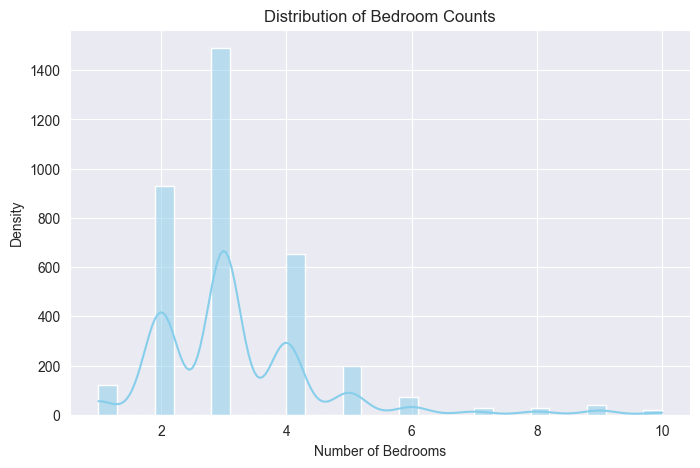

In [274]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bedRoom'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Bedroom Counts")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Density")
plt.grid(True)
plt.show()

<Axes: xlabel='bedRoom'>

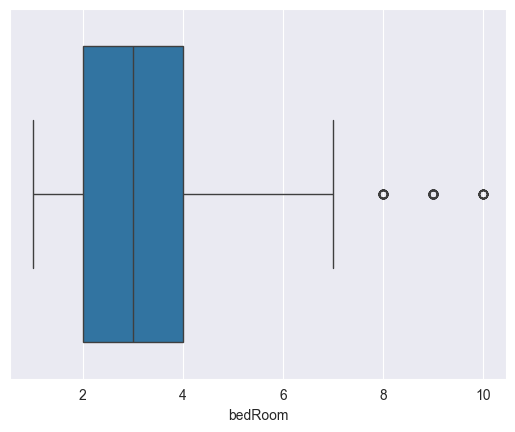

In [275]:
sns.boxplot(x=df['bedRoom'])

In [276]:
df['bedRoom'].describe()

count    3579.000000
mean        3.195027
std         1.377154
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

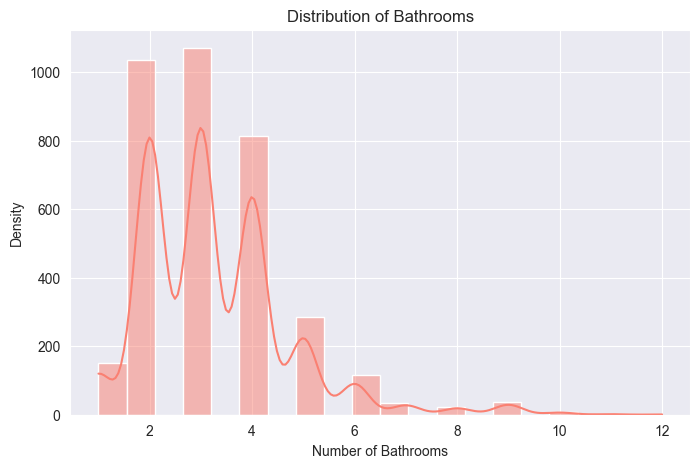

In [277]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bathroom'], kde=True, bins=20, color='salmon')
plt.title("Distribution of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Density")
plt.grid(True)
plt.show()

<Axes: xlabel='bathroom'>

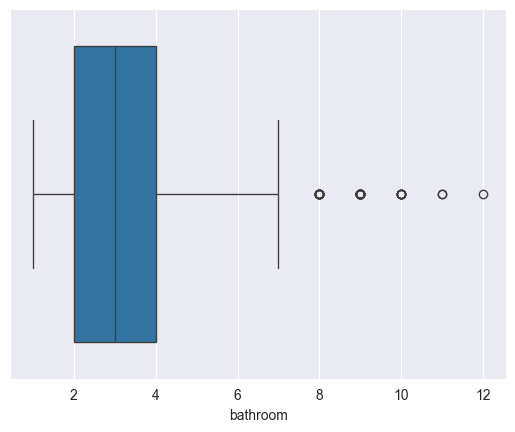

In [278]:
sns.boxplot(x=df['bathroom'])

In [279]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1095,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6389.99,NaN,0,1,0,0,0,1,146
1647,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.00,NaN,0,0,0,1,0,2,38
2562,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.00,NaN,1,1,0,1,1,1,39


In [280]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,763.05,NaN,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2.0,3.0,3,4.0,East,Relatively New,1282.95,978.23,734.43,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2.0,2.0,2,10.0,East,New Property,582.97,565.00,483.00,0,0,0,0,0,1,23


### super built up area

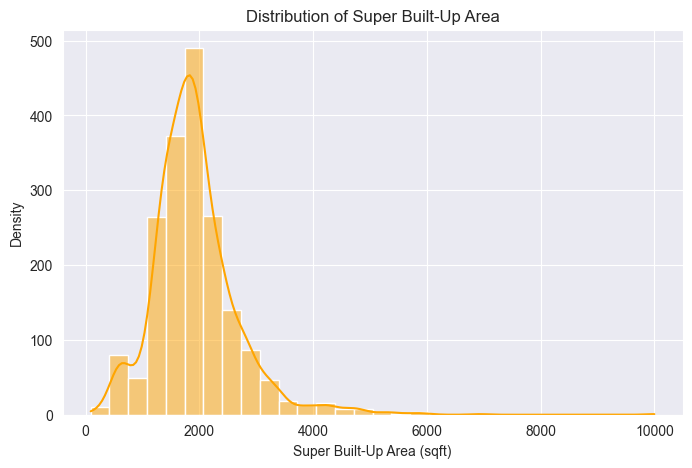

In [281]:
plt.figure(figsize=(8, 5))
sns.histplot(df['super_built_up_area'], kde=True, bins=30, color='orange')
plt.title("Distribution of Super Built-Up Area")
plt.xlabel("Super Built-Up Area (sqft)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


<Axes: xlabel='super_built_up_area'>

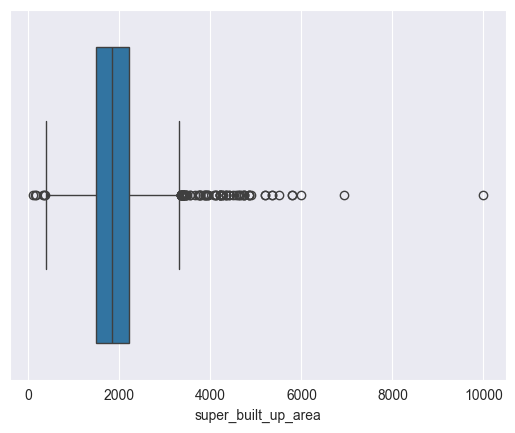

In [282]:
sns.boxplot(x=df['super_built_up_area'])

In [283]:
df['super_built_up_area'].describe()

count    1875.000000
mean     1927.073808
std       762.125583
min        89.000000
25%      1480.040000
50%      1828.030000
75%      2215.000000
max      9999.990000
Name: super_built_up_area, dtype: float64

In [284]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1324,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.03,NaN,NaN,0,1,0,0,0,1,140
1330,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,9999.99,NaN,NaN,0,1,0,1,1,0,49
2845,flat,.,gwal pahari,7.0,11000.0,6364.0,Super Built up area 6000(557.42 sq.m.),4.0,4.0,3+,6.0,South-West,Relatively New,6000.01,NaN,NaN,0,1,0,0,0,0,52


### built up area

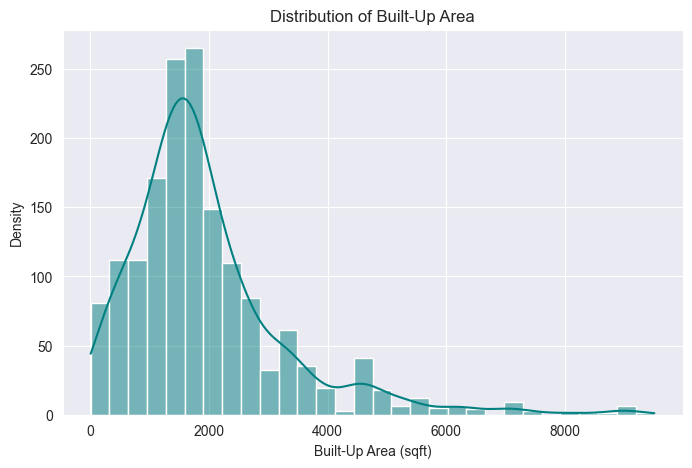

In [285]:
plt.figure(figsize=(8, 5))
sns.histplot(df['built_up_area'], kde=True, bins=30, color='teal')
plt.title("Distribution of Built-Up Area")
plt.xlabel("Built-Up Area (sqft)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


<Axes: xlabel='built_up_area'>

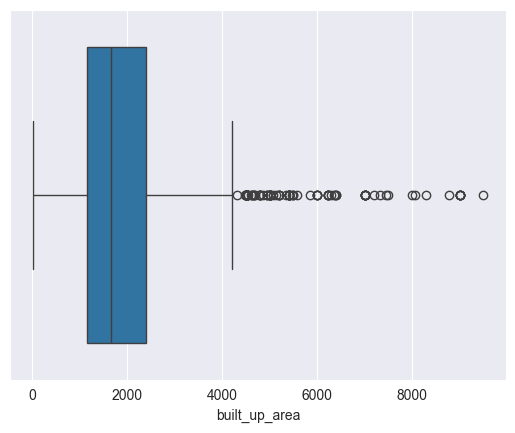

In [286]:
sns.boxplot(x=df['built_up_area'])

In [287]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


### carpet area

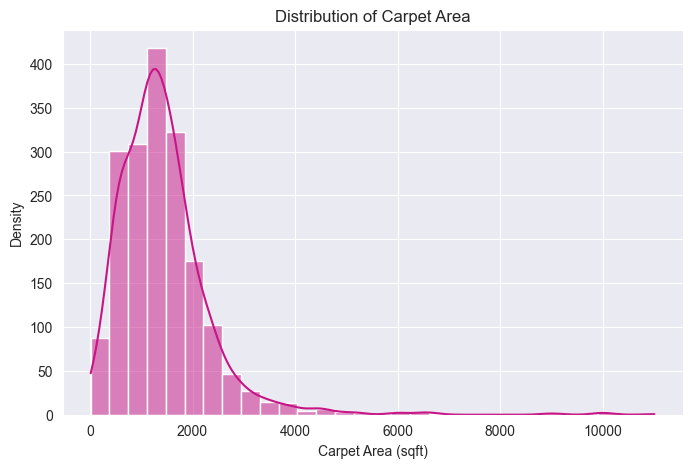

In [288]:
plt.figure(figsize=(8, 5))
sns.histplot(df['carpet_area'], kde=True, bins=30, color='mediumvioletred')
plt.title("Distribution of Carpet Area")
plt.xlabel("Carpet Area (sqft)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

<Axes: xlabel='carpet_area'>

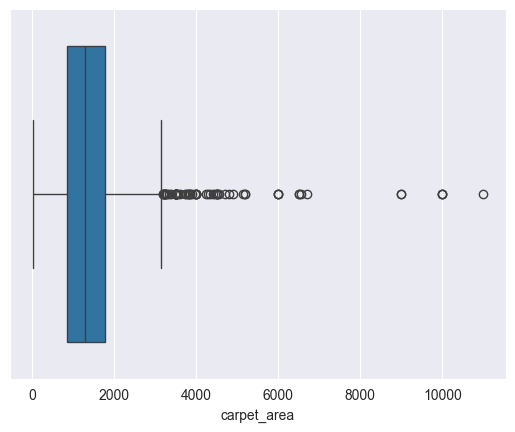

In [289]:
sns.boxplot(x=df['carpet_area'])

In [290]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3363,house,independent,sector 26,18.4,1859.0,11000.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60


In [291]:
df.loc[2131,'carpet_area'] = 1812

In [292]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3363,house,independent,sector 26,18.4,1859.0,11000.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60


In [293]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,763.05,NaN,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2.0,3.0,3,4.0,East,Relatively New,1282.95,978.23,734.43,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2.0,2.0,2,10.0,East,New Property,582.97,565.00,483.00,0,0,0,0,0,1,23


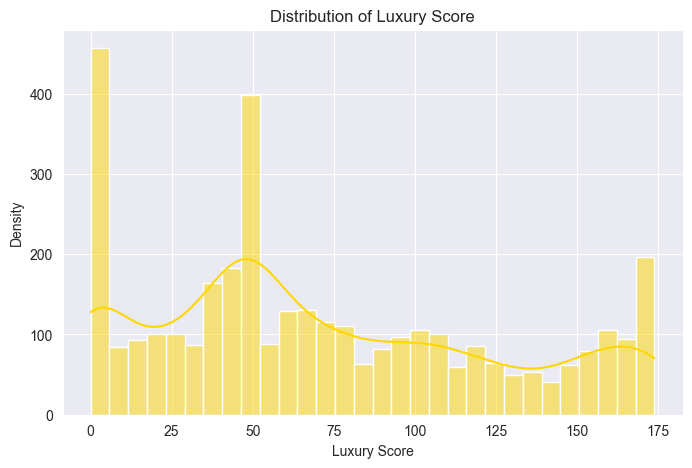

In [294]:
plt.figure(figsize=(8, 5))
sns.histplot(df['luxury_score'], kde=True, bins=30, color='gold')
plt.title("Distribution of Luxury Score")
plt.xlabel("Luxury Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()


<Axes: ylabel='luxury_score'>

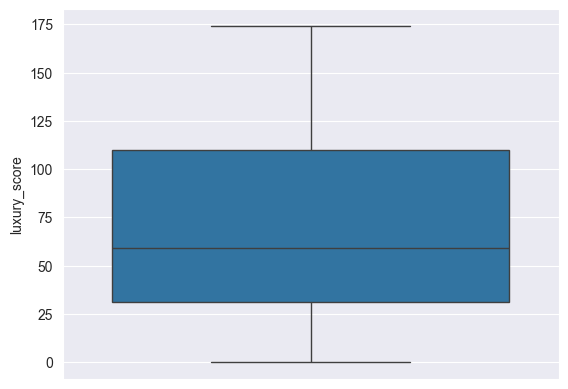

In [295]:
sns.boxplot(df['luxury_score'])

In [296]:
df.shape

(3579, 23)

In [297]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [298]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5178.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10485.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,763.05,NaN,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13351.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2.0,3.0,3,4.0,East,Relatively New,1282.95,978.23,734.43,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7033.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2.0,2.0,2,10.0,East,New Property,582.97,565.00,483.00,0,0,0,0,0,1,23


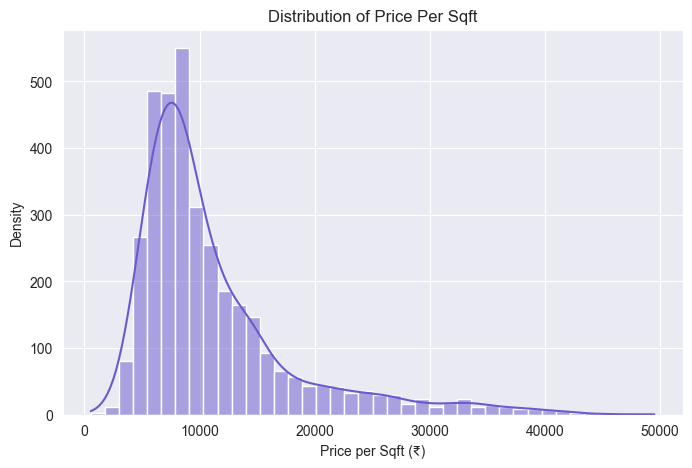

In [299]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price_per_sqft'], kde=True, bins=40, color='slateblue')
plt.title("Distribution of Price Per Sqft")
plt.xlabel("Price per Sqft (₹)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


<Axes: ylabel='price_per_sqft'>

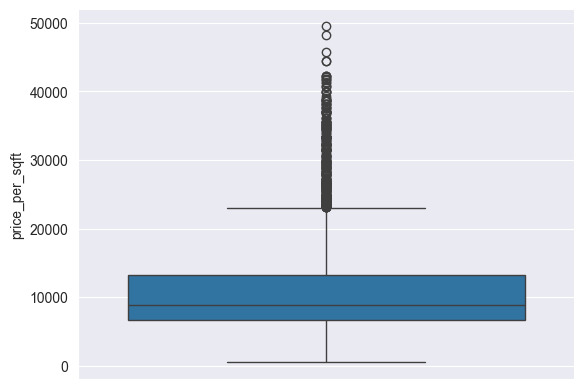

In [300]:
sns.boxplot(df['price_per_sqft'])

In [301]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
12,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.00,250.0,0,1,0,1,0,1,88
198,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.00,NaN,0,1,1,1,0,1,60
851,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.00,NaN,0,0,0,1,0,1,7
1307,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.04,1800.0,0,0,0,0,0,0,0
1909,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.00,NaN,1,1,0,0,0,1,121
2208,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.00,NaN,0,1,0,1,0,2,97
2527,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.00,NaN,1,1,1,1,0,2,0
3089,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.00,100.0,0,0,0,0,1,1,44
3550,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.00,NaN,1,1,1,1,0,1,103


In [304]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

np.float64(185.62666666666667)

In [305]:
df[(df['area']/df['bedRoom'])<185]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
32,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8.0,8.0,3,4.0,East,Moderately Old,NaN,62.0,60.0,0,0,0,0,1,1,40
45,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5.0,4.0,3,3.0,South-West,Relatively New,NaN,725.0,675.0,0,0,0,1,0,0,22
212,house,row house,sector 105,0.43,9130.0,471.0,Plot area 52(43.48 sq.m.)Built Up area: 1050 s...,3.0,3.0,3,2.0,NaN,Relatively New,NaN,1050.0,NaN,0,0,0,0,0,0,0
235,house,independent,sector 13,0.90,11465.0,785.0,Plot area 785(72.93 sq.m.),5.0,4.0,3,3.0,North-West,Moderately Old,NaN,785.0,NaN,1,1,0,1,1,0,0
241,house,independent,sector 12,1.00,8230.0,1215.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 ...,9.0,7.0,3+,3.0,North,Moderately Old,NaN,3750.0,NaN,0,0,1,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29
3642,house,not applicable,sector 4,0.51,14167.0,360.0,Plot area 40(33.45 sq.m.),4.0,4.0,3,4.0,NaN,New Property,NaN,360.0,NaN,0,0,0,0,0,0,0
3664,house,independent,sector 104,0.60,5128.0,1170.0,Plot area 130(108.7 sq.m.),7.0,3.0,1,2.0,North,Moderately Old,NaN,1170.0,NaN,0,0,0,0,0,0,0
3711,house,independent,sector 24,4.50,33333.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,10.0,8.0,3+,4.0,East,Relatively New,NaN,160.0,150.0,0,1,1,0,0,1,56


In [315]:
x = df[df['price_per_sqft']<=20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(251.8)

In [316]:
df[df['area']/df['bedRoom']<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2848,house,huda housing board colony,sector 31,4.60,31507.0,1460.0,Plot area 1460(135.64 sq.m.),6.0,4.0,3+,3.0,East,Old Property,NaN,1460.0,NaN,0,0,0,0,1,0,8
2017,house,madan puri,sector 7,0.75,12500.0,600.0,Plot area 600(55.74 sq.m.),3.0,5.0,3,3.0,South-East,Moderately Old,NaN,600.0,NaN,0,0,0,0,0,0,0
723,house,independent,sector 6,0.50,8333.0,600.0,Plot area 600(55.74 sq.m.),3.0,3.0,2,2.0,East,Moderately Old,NaN,600.0,NaN,0,0,0,1,0,0,0
3055,house,independent,sector 7,0.95,21111.0,450.0,Plot area 450(41.81 sq.m.),2.0,1.0,1,3.0,NaN,New Property,NaN,450.0,NaN,0,0,0,0,0,0,15
2570,house,iffco nagar and 17b rwa,sector 17,3.50,24306.0,1440.0,Plot area 1440(133.78 sq.m.),6.0,5.0,3,3.0,East,Old Property,NaN,1440.0,NaN,0,0,0,0,0,0,44


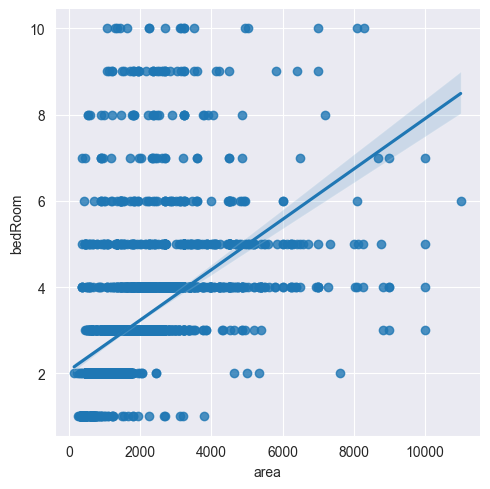

In [318]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [319]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [320]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
7.0      8
10.0     7
Name: count, dtype: int64

In [324]:
df = df[df['area_room_ratio'] > 100]

In [325]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [326]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\dell\AppData\Local\Temp\ipykernel_7896\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [327]:
df.update(outliers_df)

In [328]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [329]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
58,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.00,NaN,0,0,0,0,0,0,0,222.750000
112,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2249.98,NaN,0,0,0,0,0,0,0,225.000000
540,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.00,NaN,0,0,0,0,0,0,0,113.000000
688,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.00,NaN,0,0,0,0,0,0,0,150.000000
952,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.00,NaN,1,1,0,1,1,1,0,225.000000
1112,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,899.97,0,0,0,0,0,0,0,150.000000
1636,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,989.96,0,0,0,0,0,0,0,198.000000
2075,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,899.97,0,0,0,0,0,0,0,180.000000
2436,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1099.96,900.00,0,0,0,0,0,0,0,220.000000
2544,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,1080.05,0,0,0,0,0,0,0,120.000000


In [330]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [331]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
58,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.00,NaN,0,0,0,0,0,0,0,222.750000
112,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2249.98,NaN,0,0,0,0,0,0,0,225.000000
540,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.00,NaN,0,0,0,0,0,0,0,113.000000
688,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.00,NaN,0,0,0,0,0,0,0,150.000000
952,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.00,NaN,1,1,0,1,1,1,0,225.000000
1112,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,899.97,0,0,0,0,0,0,0,150.000000
1636,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,989.96,0,0,0,0,0,0,0,198.000000
2075,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,899.97,0,0,0,0,0,0,0,180.000000
2436,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1099.96,900.00,0,0,0,0,0,0,0,220.000000
2544,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,1080.05,0,0,0,0,0,0,0,120.000000


In [332]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)].shape

(13, 24)

In [333]:
df.shape

(3559, 24)

In [334]:
df = df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

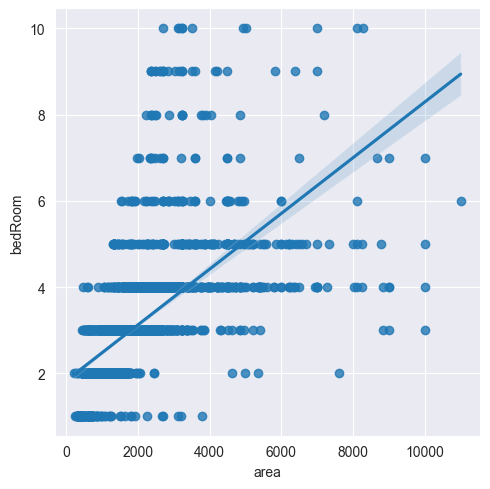

In [336]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [337]:
df.shape

(3546, 24)

In [338]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,shree vardhman flora,sector 90,0.70,5178.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49,676.0
1,house,independent,sector 69,0.80,10485.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,763.05,NaN,0,0,0,0,0,0,0,763.0
2,flat,experion the heartsong,sector 108,0.98,13351.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2.0,3.0,3,4.0,East,Relatively New,1282.95,978.23,734.43,1,0,0,0,0,0,135,367.0
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105,690.0
4,flat,pivotal devaan,sector 84,0.41,7033.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2.0,2.0,2,10.0,East,New Property,582.97,565.00,483.00,0,0,0,0,0,1,23,291.5


In [339]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)